In [88]:
# Reverse-correlating the faces of diversity advocates and racial activists
# Analysis script for Study 2
# Evan W. Carr, 05-08-2018 (Columbia Business School)

import pandas as pd
import numpy as np
from plotnine import *
from rpy2.robjects import r, pandas2ri

%matplotlib inline  

# Set working directory to location of data files, and read in .csv's:
rawData = pd.read_csv('rcblm2_data_10212017.csv')

rawData.head(20)

,StartDate,EndDate,IPAddress,Progress,Duration (in seconds),Finished,ResponseId,LocationLatitude,LocationLongitude,DistributionChannel,...,ra_lib_emo,da_con_threat,da_lib_threat,ra_con_threat,ra_lib_threat,age,sex,race,data_use,mTurkCode
0,10/18/2017 21:05,10/18/2017 21:05,69.242.182.26,100,36,1,R_3MzXtGfi5OhZCPk,39.005005,-94.249901,anonymous,...,8,9,8,9,6,20,2,1,4,5474007199
1,10/18/2017 21:06,10/18/2017 21:07,73.25.182.21,100,73,1,R_3oZ3cBA4NsAHKw6,44.901596,-122.922302,anonymous,...,6,4,4,4,3,24,2,4,4,3789878092
2,10/18/2017 21:06,10/18/2017 21:09,40.142.208.183,100,139,1,R_1KeeCjPeylgdRIW,41.040100,-79.511803,anonymous,...,6,1,6,8,1,33,2,1,4,1416690252
3,10/18/2017 21:09,10/18/2017 21:10,73.200.235.170,100,89,1,R_3s4eIAB938cXyAh,38.895401,-77.029701,anonymous,...,7,3,8,3,2,31,1,1,3,2952936082
4,10/18/2017 21:08,10/18/2017 21:10,207.181.207.19,100,133,1,R_2o9xIVkzs0tOklH,41.928802,-87.631500,anonymous,...,6,3,3,4,3,34,1,1,4,6779187377
5,10/18/2017 21:09,10/18/2017 21:11,24.159.120.204,100,116,1,R_21Bwc1TZZlXBZPf,33.956207,-83.987999,anonymous,...,9,1,1,8,1,40,2,2,4,6402868857
6,10/18/2017 21:10,10/18/2017 21:11,74.196.102.250,100,106,1,R_6Ej2Jmv4Tzf0C5P,35.959198,-96.755402,anonymous,...,8,5,2,6,4,42,2,1,4,3711484824
7,10/18/2017 21:10,10/18/2017 21:12,24.17.39.56,100,110,1,R_QmPTHcOxoPkcf0l,47.382401,-122.313797,anonymous,...,5,4,5,8,3,40,2,1,4,1411850220
8,10/18/2017 21:14,10/18/2017 21:18,68.68.158.94,100,258,1,R_27wH8GQ2PPrdaYo,39.474503,-95.695503,anonymous,...,8,2,2,2,1,55,2,1,4,6150800548
9,10/18/2017 22:40,10/18/2017 22:43,24.26.1.187,100,147,1,R_W9HfZFjfDoSYQ37,37.755493,-87.043404,anonymous,...,6,1,1,9,1,30,1,1,4,1962832539


In [89]:
# Create new clean version of the data frame:
cleanData = pd.concat([rawData.loc[:, 'Finished':'ResponseId'], 
                       rawData.loc[:, 'da_con_trust':'data_use']], 
                      axis=1)
cleanData = (cleanData
             .query('(Finished == 1) & (data_use >= 3)')
             .drop(['Finished', 'age', 'sex', 'race', 'data_use'], axis=1))
cleanData = pd.melt(cleanData, 
                    id_vars=['ResponseId'], 
                    var_name='TrialType', 
                    value_name='Choice').sort_values(by=['ResponseId', 'TrialType'])
cleanData.sample(n=20)

,ResponseId,TrialType,Choice
4226,R_1DnYxlZZSPodG1R,ra_con_emo,5
3438,R_vP4U8v9LYxLOOZ3,ra_lib_race,3
3867,R_2D043u2QzWRPCYg,da_lib_emo,7
4345,R_1my0oegxI6cOQ8r,ra_con_emo,2
1248,R_2D043u2QzWRPCYg,da_con_gender,5
3778,R_2rrs2FlL2OfZ4W8,da_con_emo,5
4933,R_3PvQOWTKVjAhALV,da_con_threat,3
4669,R_ABW849BNTfNoZrz,da_con_threat,2
4495,R_1GP10Sfl84UnREJ,ra_lib_emo,3
1904,R_2aRXw7iZX6yuPSX,ra_con_gender,1


In [90]:
# Get quick demographics summary, without excluded subjects:
demogSummary = (rawData
                .query('(Finished == 1) & (data_use >= 3)')
                .groupby('ResponseId')
                .agg({'age': np.mean, 'sex': pd.Series.unique, 'race': pd.Series.unique})
                .reset_index())

demogSummary['age'].mean()

35.81786941580756

In [91]:
demogSummary['age'].std()

10.955292702779724

In [92]:
# 1 = male, 2 = female
demogSummary['sex'].value_counts()

2    169
1    122
Name: sex, dtype: int64

In [93]:
# 1 = White-American, 2 = African-American, 3 = Hispanic, 4 = Asian-American, 5 = other
demogSummary['race'].value_counts()

1    221
4     23
2     22
3     16
5      9
Name: race, dtype: int64

In [94]:
# Split TrialType column into our different factors:
cleanData[['Label', 'PolAff', 'RatingDim']] = cleanData['TrialType'].str.split('_', expand=True)
cleanData.sample(n=20)

,ResponseId,TrialType,Choice,Label,PolAff,RatingDim
1758,R_DJ0eDsVD5XLj2Y9,ra_con_gender,1,ra,con,gender
3475,R_1Q4yVo5e8bbRbA5,ra_lib_race,6,ra,lib,race
4329,R_ByyKzRHIOhDE1Ed,ra_con_emo,1,ra,con,emo
521,R_3HYyzcN0uOPGcnr,da_lib_trust,7,da,lib,trust
1779,R_Dq79QTLU6E2R3KF,ra_con_gender,3,ra,con,gender
1892,R_1FEYJQhpbgE4IDG,ra_con_gender,2,ra,con,gender
5512,R_1Q4yVo5e8bbRbA5,ra_con_threat,4,ra,con,threat
385,R_3OrDq8wkxYWctTK,da_lib_trust,4,da,lib,trust
110,R_3Kvcpa2V7yz23hm,da_con_trust,7,da,con,trust
4981,R_3lyM0Tgq5O9wkaA,da_lib_threat,1,da,lib,threat


In [95]:
# Rename factor codes using different dictionaries: 
labelDict = {
    'da': 'Diversity Advocate',
    'ra': 'Racial Activist'
}

polAffDict = {
    'con': 'Conservative',
    'lib': 'Liberal'
}

ratingDict = {
    'emo': 'Emotion (1 = Angry, 9 = Happy)',
    'gender': 'Gender (1 = Male, 9 = Female)',
    'race': 'Race (1 = Black, 9 = White)',
    'threat': 'Threat (1 = None, 9 = All)',
    'trust': 'Trust (1 = None, 9 = All)'
}

cleanData['Label'] = cleanData['Label'].map(labelDict)
cleanData['PolAff'] = cleanData['PolAff'].map(polAffDict)
cleanData['RatingDim'] = cleanData['RatingDim'].map(ratingDict)

cleanData.sample(n=20)

,ResponseId,TrialType,Choice,Label,PolAff,RatingDim
212,R_YYY01DhbVxtVMNb,da_con_trust,4,Diversity Advocate,Conservative,"Trust (1 = None, 9 = All)"
3544,R_294h2M2gE3qetU8,da_con_emo,7,Diversity Advocate,Conservative,"Emotion (1 = Angry, 9 = Happy)"
4157,R_1jlyeGtwP3heups,ra_con_emo,6,Racial Activist,Conservative,"Emotion (1 = Angry, 9 = Happy)"
2109,R_a3OeivGSxYnP3vH,ra_lib_gender,8,Racial Activist,Liberal,"Gender (1 = Male, 9 = Female)"
3994,R_pDC7ibB1oADIqMV,da_lib_emo,5,Diversity Advocate,Liberal,"Emotion (1 = Angry, 9 = Happy)"
2424,R_1IEJArufuyTTmGW,da_con_race,5,Diversity Advocate,Conservative,"Race (1 = Black, 9 = White)"
3236,R_1Quydcbl5mNIEMS,ra_lib_race,3,Racial Activist,Liberal,"Race (1 = Black, 9 = White)"
756,R_2Bmp8SJyHHSKKuJ,ra_con_trust,2,Racial Activist,Conservative,"Trust (1 = None, 9 = All)"
5573,R_1rMwZ38fe8Of05L,ra_lib_threat,6,Racial Activist,Liberal,"Threat (1 = None, 9 = All)"
2792,R_1QbH5ANiWq3SMHH,da_lib_race,2,Diversity Advocate,Liberal,"Race (1 = Black, 9 = White)"


In [96]:
# Create summary dataframe with means, SDs, and SEMs by cell:
summaryData = (cleanData
               .groupby(['Label', 'PolAff', 'RatingDim'])
               .agg({'Choice': [np.mean, np.std]})
               .reset_index())

def flatten_cols(df):
    df.columns = ['_'.join(tuple(map(str, t))).rstrip('_') for t in df.columns.values]
    return df

summaryData = flatten_cols(summaryData)

# Calculate SEM, along with lower and upper limits from means:
summaryData['Choice_sem'] = summaryData['Choice_std'] / np.sqrt(len(cleanData['ResponseId'].unique()))
summaryData['Choice_sem_lower'] = summaryData['Choice_mean'] - summaryData['Choice_sem']
summaryData['Choice_sem_upper'] = summaryData['Choice_mean'] + summaryData['Choice_sem']

summaryData

,Label,PolAff,RatingDim,Choice_mean,Choice_std,Choice_sem,Choice_sem_lower,Choice_sem_upper
0,Diversity Advocate,Conservative,"Emotion (1 = Angry, 9 = Happy)",6.281787,1.373259,0.080502,6.201285,6.362289
1,Diversity Advocate,Conservative,"Gender (1 = Male, 9 = Female)",7.085911,1.805024,0.105812,6.980098,7.191723
2,Diversity Advocate,Conservative,"Race (1 = Black, 9 = White)",3.051546,1.825326,0.107003,2.944544,3.158549
3,Diversity Advocate,Conservative,"Threat (1 = None, 9 = All)",3.027491,1.838084,0.107750,2.919741,3.135242
4,Diversity Advocate,Conservative,"Trust (1 = None, 9 = All)",5.920962,1.405877,0.082414,5.838548,6.003376
5,Diversity Advocate,Liberal,"Emotion (1 = Angry, 9 = Happy)",6.350515,1.551693,0.090962,6.259554,6.441477
6,Diversity Advocate,Liberal,"Gender (1 = Male, 9 = Female)",7.103093,1.846625,0.108251,6.994842,7.211344
7,Diversity Advocate,Liberal,"Race (1 = Black, 9 = White)",2.896907,1.768408,0.103666,2.793241,3.000573
8,Diversity Advocate,Liberal,"Threat (1 = None, 9 = All)",2.989691,1.837323,0.107706,2.881985,3.097396
9,Diversity Advocate,Liberal,"Trust (1 = None, 9 = All)",5.993127,1.499409,0.087897,5.905230,6.081024


In [97]:
# Run mixed-effects models on each DV in R:
#    - fixed = Label (DA vs. RA) & Political Affiliation (Liberal vs. Conservative)
#    - random = subject

# Push objects to R to generate models using lme4/lmerTest packages:

pandas2ri.activate()
%load_ext rpy2.ipython
%R -i cleanData

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [98]:
%%R

library(lmerTest)
library(dplyr)

cleanData$Label <- as.factor(cleanData$Label)
cleanData$PolAff <- as.factor(cleanData$PolAff)
cleanData$RatingDim <- as.factor(cleanData$RatingDim)

mlm_emo <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Emotion (1 = Angry, 9 = Happy)")) 
mlm_gender <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Gender (1 = Male, 9 = Female)")) 
mlm_race <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Race (1 = Black, 9 = White)")) 
mlm_threat <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Threat (1 = None, 9 = All)")) 
mlm_trust <- lmer(Choice ~ Label * PolAff + (1|ResponseId), data = filter(cleanData, RatingDim == "Trust (1 = None, 9 = All)")) 

mlm_emo_anova <- anova(mlm_emo)
mlm_gender_anova <- anova(mlm_gender)
mlm_race_anova <- anova(mlm_race)
mlm_threat_anova <- anova(mlm_threat)
mlm_trust_anova <- anova(mlm_trust)

In [99]:
# Pull model results back to python:
%R -o mlm_emo_anova,mlm_gender_anova,mlm_race_anova,mlm_threat_anova,mlm_trust_anova

In [100]:
pandas2ri.ri2py(mlm_emo_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,930.997423,930.997423,1,869.999902,474.817069,0.0
PolAff,1071.897766,1071.897766,1,869.999902,546.677513,0.0
Label:PolAff,996.502577,996.502577,1,869.999902,508.225288,0.0


In [101]:
pandas2ri.ri2py(mlm_gender_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,1501.446735,1501.446735,1,869.999837,510.338811,0.0
PolAff,1533.415808,1533.415808,1,869.999837,521.205036,0.0
Label:PolAff,1510.546392,1510.546392,1,869.999837,513.431766,0.0


In [102]:
pandas2ri.ri2py(mlm_race_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,34.708763,34.708763,1,870.000136,20.778132,5.894617e-06
PolAff,23.389175,23.389175,1,870.000136,14.001749,1.946226e-04
Label:PolAff,55.863402,55.863402,1,870.000136,33.442193,1.023204e-08


In [103]:
pandas2ri.ri2py(mlm_threat_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,855.673540,855.673540,1,870.000074,289.270051,0.0
PolAff,859.106529,859.106529,1,870.000074,290.430612,0.0
Label:PolAff,821.721649,821.721649,1,870.000074,277.792233,0.0


In [104]:
pandas2ri.ri2py(mlm_trust_anova)

,Sum Sq,Mean Sq,NumDF,DenDF,F.value,Pr(>F)
Label,370.832474,370.832474,1,869.999895,214.986298,0.0
PolAff,500.145189,500.145189,1,869.999895,289.954009,0.0
Label:PolAff,446.598797,446.598797,1,869.999895,258.911041,0.0


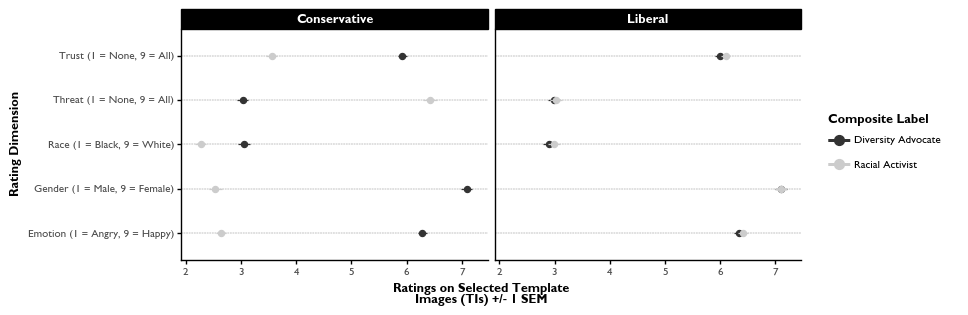

<ggplot: (123826323639)>

In [105]:
# Use plotnine package to plot our summaryData, using ggplot2 (R) style ...
(ggplot(summaryData, aes(x='factor(RatingDim)', y='Choice_mean', color='factor(Label)')) 
 + geom_pointrange(aes(ymin='Choice_sem_lower', ymax='Choice_sem_upper'), size=0.5)
 + facet_wrap('~ PolAff', nrow=1)
 + labs(color='Composite Label',
        x='Rating Dimension',
        y = 'Ratings on Selected Template\nImages (TIs) +/- 1 SEM')
 + theme_classic()
 + coord_flip()
 + scale_color_grey()
 + theme(figure_size = (8, 3),
         text = element_text(family='Gill Sans MT'),
         axis_text_x = element_text(size=8),
         axis_title_x = element_text(size=9, weight='bold'),
         axis_text_y = element_text(size=8),
         axis_title_y = element_text(size=9, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='black'),
         legend_position = 'right',
         legend_title = element_text(size=9, weight='bold'),
         legend_text = element_text(size=8),
         strip_text_x = element_text(size=9, weight='bold', color='white'), 
         strip_background = element_rect(fill='black'),
         panel_grid_major_y = element_line(color='gray', size=0.35, linetype='dashed')))